## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that we get some practice working with the difficulties of these 

For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [5]:
((df["converted"] == 1).sum() / df.shape[0]) * 100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
((df["group"] == "treatment") & (df["landing_page"] != "new_page")).sum()

1965

In [7]:
((df["group"] == "control") & (df["landing_page"] != "old_page")).sum()

1928

In [8]:
# number of total times rows didn't line up for each group
((df["group"] == "treatment") & (df["landing_page"] != "new_page")).sum() + ((df["group"] == "control") & (df["landing_page"] != "old_page")).sum()

3893

f. Do any of the rows have missing values?

In [9]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page. 

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df[(df["group"] == "treatment") & (df["landing_page"] == "new_page") | 
  (df["group"] == "control") & (df["landing_page"] == "old_page")]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [12]:
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

`3.` Use **df2** .

a. How many unique **user_id**s are in **df2**?

In [13]:
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2["user_id"].duplicated()]["user_id"]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2 = df2.drop(index = df2[df2["user_id"].duplicated()].index)

In [17]:
df2.count()

user_id         290584
timestamp       290584
group           290584
landing_page    290584
converted       290584
dtype: int64

`4.` Use **df2** .

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df["converted"].value_counts(normalize=True)

0    0.880341
1    0.119659
Name: converted, dtype: float64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#first Solution
old_cr = ((df2["converted"] == 1) & (df2["group"] == "control")).sum() / (df2["group"] == "control").sum()
old_cr

0.1203863045004612

In [20]:
#Second Solution
df2.groupby("group")["converted"].value_counts(normalize=True)

group      converted
control    0            0.879614
           1            0.120386
treatment  0            0.881192
           1            0.118808
Name: converted, dtype: float64

In [21]:
#Third solution
pd.crosstab(index=df2['group'], columns=df2['converted'], normalize="index")

converted,0,1
group,,
control,0.879614,0.120386
treatment,0.881192,0.118808


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
#first Solution
new_cr = ((df2["converted"] == 1) & (df2["group"] == "treatment")).sum() / (df2["group"] == "treatment").sum()
new_cr

0.11880806551510564

In [23]:
#Second Solution
df2.groupby("group")["converted"].value_counts(normalize=True)

group      converted
control    0            0.879614
           1            0.120386
treatment  0            0.881192
           1            0.118808
Name: converted, dtype: float64

In [24]:
#Third solution
pd.crosstab(index=df2['group'], columns=df2['converted'], normalize="index")

converted,0,1
group,,
control,0.879614,0.120386
treatment,0.881192,0.118808


d. What is the probability that an individual received the new page?

In [25]:
df2["landing_page"].value_counts(normalize=True)

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [26]:
obs_diff = new_cr - old_cr 
obs_diff

-0.0015782389853555567

<span style="color: red;">
No becouse the Convertion rate of old_page is higher than new_page (obs_diff is nigative value) so from what we get now there is no sufficient evidence to say new_page is better. </span>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<span style="color: red;">
$$H_0:  p_{old} \geq p_{new} $$
$$H_1: p_{old} < p_{new} $$
</span>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **convert rate** for $p_{new}$ under the null? 

<span style="color: red;">
Same as converted rate of $p_{old}$ as we assume they have "true" success rates equal to the converted success rate regardless of page.(0.1196) </span>

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

<span style="color: red;">
Same as converted rate of $p_{new}$ as we assume they have "true" success rates equal to the converted success rate regardless of page.(0.1196) </span>

c. What is $n_{new}$?

In [27]:
n_new = (df2["landing_page"] == "new_page").sum()
n_new

145310

d. What is $n_{old}$?

In [28]:
n_old = (df2["landing_page"] == "old_page").sum()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
np.random.seed(42)
size = df2.shape[0]
new_page_converted = np.random.choice(df2[df2["landing_page"] == "new_page"]["converted"],size=size,replace=True)
p_new = new_page_converted.sum() / (df2["landing_page"] == "new_page").sum()
p_new

0.2365494460119744

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
np.random.seed(42)
size = df2.shape[0]
old_page_converted = np.random.choice(df2[df2["landing_page"] == "old_page"]["converted"],size=size,replace=True)
p_old = old_page_converted.sum() / (df2["landing_page"] == "old_page").sum()
p_old

0.2438013684485868

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
p_new - p_old

-0.007251922436612407

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
np.random.seed(42)
p_new = p_old = df2['converted'].mean()
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

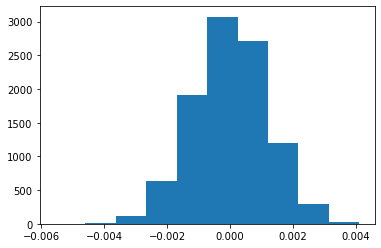

In [33]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

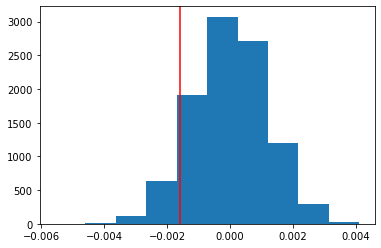

In [34]:
plt.hist(p_diffs);
plt.axvline(obs_diff,c="r");

In [35]:
# Compute p-value
(p_diffs > obs_diff).mean()

0.9053

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<span style="color: red;">
    
- we compute ( p_diffs > obs_diff ) which called P_value in scientific studies.
    
- P_value > $\alpha$ ($\alpha$ = 0.05) Which mean we fail to reject $H_{0}$ and that's mean old_page is better than new_page.
</span>    

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
convert_old = ((df2["landing_page"] == "old_page") & (df2["converted"] == 1)).sum()
convert_new = ((df2["landing_page"] == "new_page") & (df2["converted"] == 1)).sum()
n_old = (df2["landing_page"] == "old_page").sum()
n_new = (df2["landing_page"] == "new_page").sum()


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
import statsmodels.api as sm
count_array = np.array([convert_new,convert_old])
nobs_array = np.array([n_new,n_old])
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='larger',)
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<span style="color: red;">
    
- Form z-score we have an observation below the mean with 1.310 
    
- We have $Z_{score}$ < $Z_{\alpha}$ ( $Z_{\alpha} $ = $Z_{0.05} $ = 1.960 ) form z-score we fail to reject $H_{0}$
                         
- p_value > $\alpha$ ($\alpha$ = 0.05) so we fail to reject $H_{0}$
    
- From this results it's agree with our results in part j. and k.
</span>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<span style="color: red;">
Logistic Regression because we classify between two values 0's and 1's (no conversion and conversion).
</span>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
df2["intercept"] = 1 
df2["ab_page"] = pd.get_dummies(df2["group"],drop_first=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
logm = sm.Logit(df2["converted"],df2[["intercept","ab_page"]])
results = logm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-11-13 04:02 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

<span style="color: red;">
    
- p-value associated with ab_page is 0.1899. 
    
- it's differnt with part II because here it's two-tailed or two-sided test, whereas in Part II it was a one-sided test.
    
- the hypotheses in the regression model
    
     $$H_0:  p_{old} = p_{new} $$
    $$H_1: p_{old} \neq p_{new} $$
    
    
- if we compare it with Type I Error (0.05). ab_page will be not statistically significant.
    
- due to p-value we fail to reject null hypotheses.
</span>    

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

 <span style="color: red;">
    
 - it may be better if we use other factors in our model like duration of user in the page.
    
 - there are some disadvantages of adding additional terms into regression model like 
  - 1- Multicolinearity
  - 2- Non-constant variance 
</span>  

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.

Does it appear that country had an impact on conversion? 

Provide the statistical output as well as a written response to answer this question.

In [41]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [42]:
df_new["country"].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [43]:
### Create the necessary dummy variables
df_new[["CA","UK","US"]] = pd.get_dummies(df_new["country"])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [44]:
### Fit Your Linear Model And Obtain the Results
logm_us = sm.Logit(df_new["converted"],df_new[['intercept','ab_page','US','UK']])
result_us = logm_us.fit()
result_us.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2022-11-13 04:02 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

<span style="color: red;">
    
- p-value of each country is higher than Type I Error (0.05).
    
- we fail to reject null hypotheses.
    
- country is not statistically significant to predict conversion.
    
</span>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
logm_new = sm.Logit(df_new["converted"],df_new[['intercept','ab_page','US','UK','US_ab_page','UK_ab_page']])
result_new = logm_new.fit()
result_new.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-11-13 04:02 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

<span style="color: red;">
    
- p-value of each factor is higher than Type I Error (0.05).
    
- we fail to reject null hypotheses.
    
- ab_page is not statistically significant.
    
- country is not statistically significant to predict conversion.
    
- The interaction between page and country is not significant effects on conversion.
</span>


<a id='conclusions'></a>
## Conclusions

- $P_{value}$ > $P_{\alpha}$. (Type I Error = $\alpha$ = 0.05)
- ab_page is not statistically significant to predict conversion.
- country is not statistically significant in predict conversion.
- so according to all of this The old page is have higher convertion rate.
- So our suggesion is to keep the old webpage.
